In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df_copy = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.duplicated().sum()

0

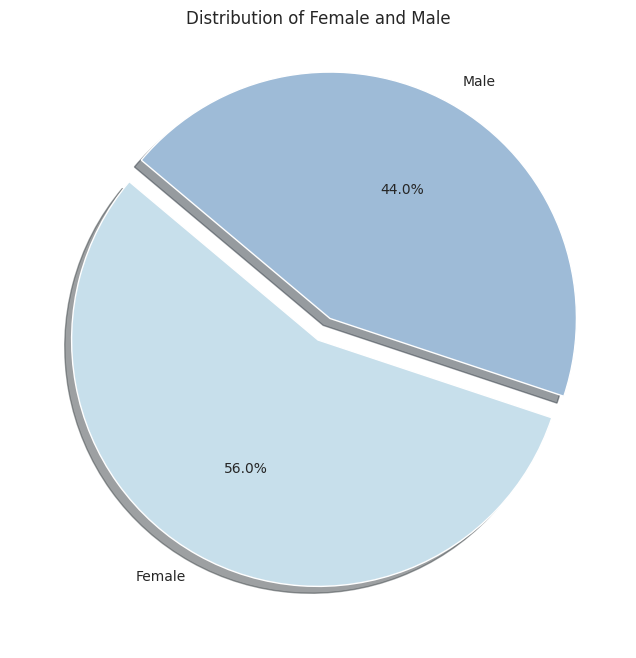

In [11]:
#VISUALIZATION
colors =sns.color_palette("ch:s=.25,rot=-.25")

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
explode = (0, 0.1)
plt.pie(df['Gender'].value_counts(), explode=explode, labels=['Female', 'Male'], autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=140)

# Grafiği düzenle
plt.title('Distribution of Female and Male')
plt.axis('off')
plt.show()

In [12]:
df['Gender Encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


**Correlations and Multicollinearity**

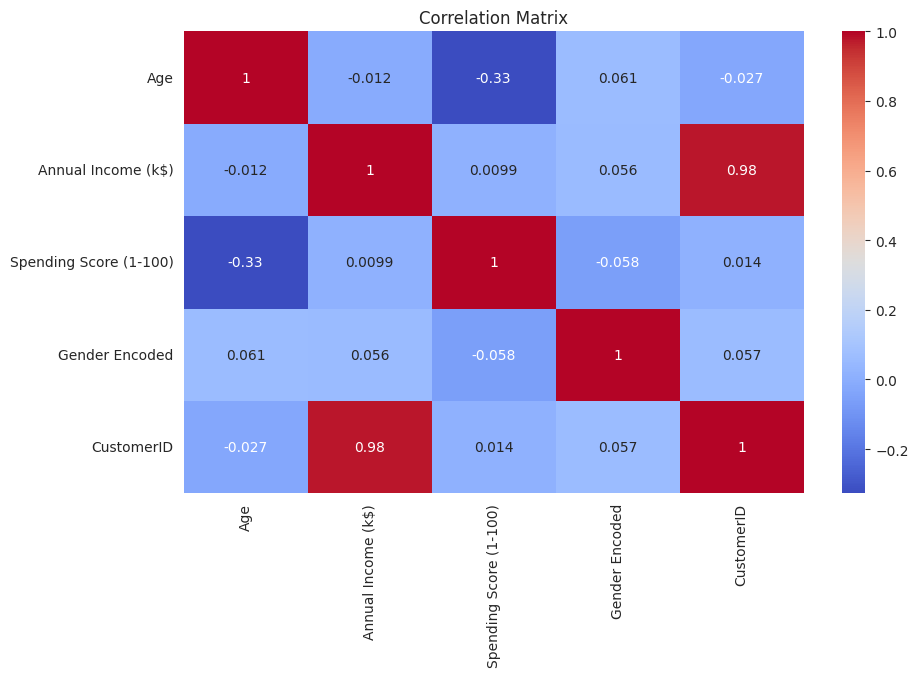

In [16]:
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender Encoded', 'CustomerID']

correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.drop("CustomerID", inplace=True, axis=1)

In [18]:
df.drop("Gender", inplace=True, axis=1)

In [19]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender Encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [20]:
df2_copy = df.copy()

In [21]:
#Scaling
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = df[numeric_columns].copy()
scaler = StandardScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled)
df = df.drop(columns=numeric_columns)
# Concatenate the scaled numerical columns with the original dataset
df_std = pd.concat([df, df_scaled], axis=1)
print(df_std.head())

   Gender Encoded       Age  Annual Income (k$)  Spending Score (1-100)
0               1 -1.424569           -1.738999               -0.434801
1               1 -1.281035           -1.738999                1.195704
2               0 -1.352802           -1.700830               -1.715913
3               0 -1.137502           -1.700830                1.040418
4               0 -0.563369           -1.662660               -0.395980


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Select the numerical columns to be scaled
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a copy of the original numerical columns into a new DataFrame
df_scaled = df[numeric_columns].copy()

# Use MinMaxScaler to scale the selected numerical columns
scaler = MinMaxScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Drop the original numerical columns from the original dataset
df = df.drop(columns=numeric_columns)

# Concatenate the scaled numerical columns with the original dataset
df_min_max = pd.concat([df, df_scaled], axis=1)

# Display the modified dataset
print(df_min_max.head())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959


In [24]:
X1 = df_min_max[['Age', 'Annual Income (k$)']]
print(X1)

          Age  Annual Income (k$)
0    0.019231            0.000000
1    0.057692            0.000000
2    0.038462            0.008197
3    0.096154            0.008197
4    0.250000            0.016393
..        ...                 ...
195  0.326923            0.860656
196  0.519231            0.909836
197  0.269231            0.909836
198  0.269231            1.000000
199  0.230769            1.000000

[200 rows x 2 columns]


In [25]:
from sklearn.cluster import KMeans
ssd = []    # inertia  .. SSD, "Sum of Squared Distances"

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

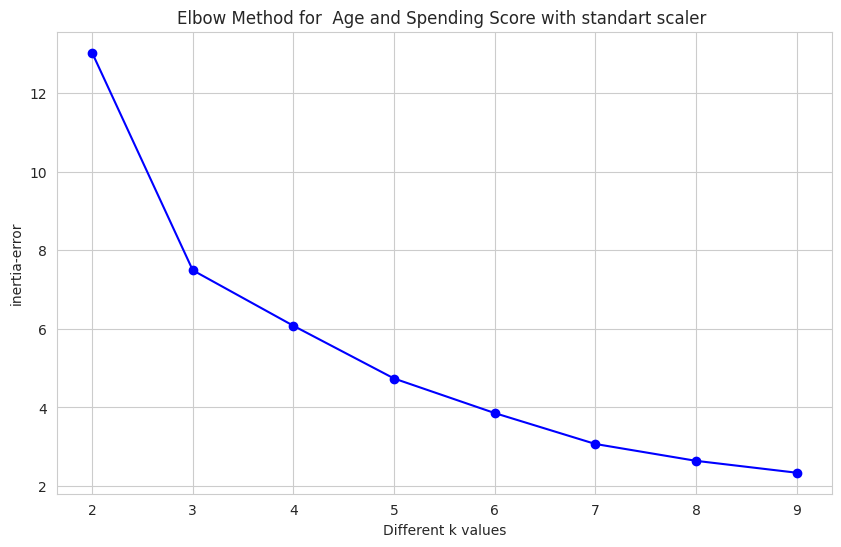

In [26]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method for  Age and Spending Score with standart scaler ")
plt.show()

In [27]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,5.536831
3,1.412905
4,1.341634
5,0.879501
6,0.786673
7,0.428875
8,0.302530


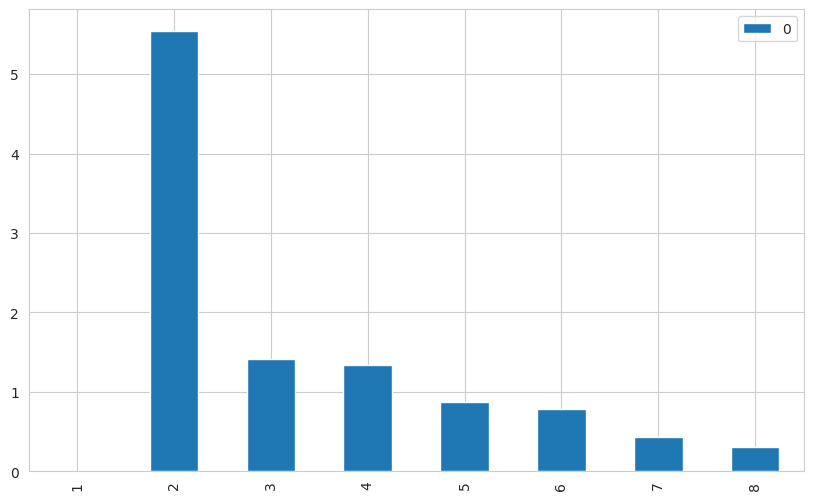

In [28]:
df_diff.plot(kind='bar');

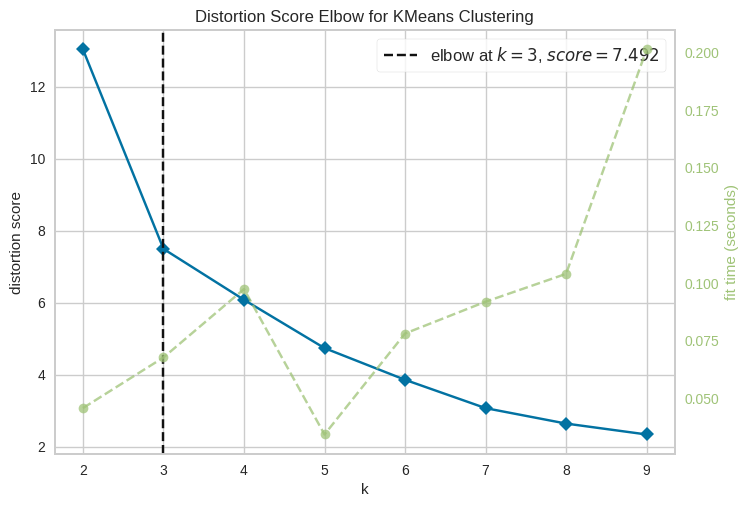

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X1)
visualizer.show();

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41300834916124046
For n_clusters=3, the silhouette score is 0.4404806396916148
For n_clusters=4, the silhouette score is 0.3906120606897494
For n_clusters=5, the silhouette score is 0.37208416501342073
For n_clusters=6, the silhouette score is 0.3915991798231264
For n_clusters=7, the silhouette score is 0.39883701322775744
For n_clusters=8, the silhouette score is 0.411161159279936


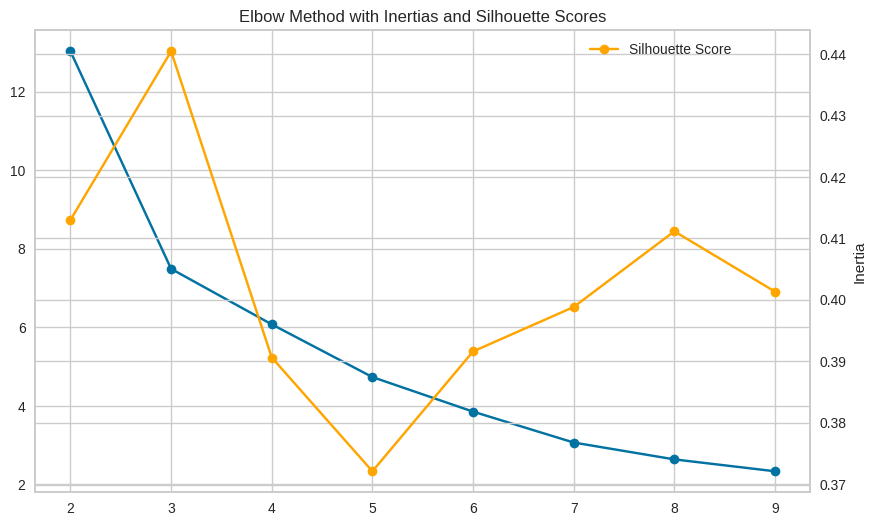

In [32]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X1)
    silhouette = silhouette_score(X1, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

 visualize all the cluster

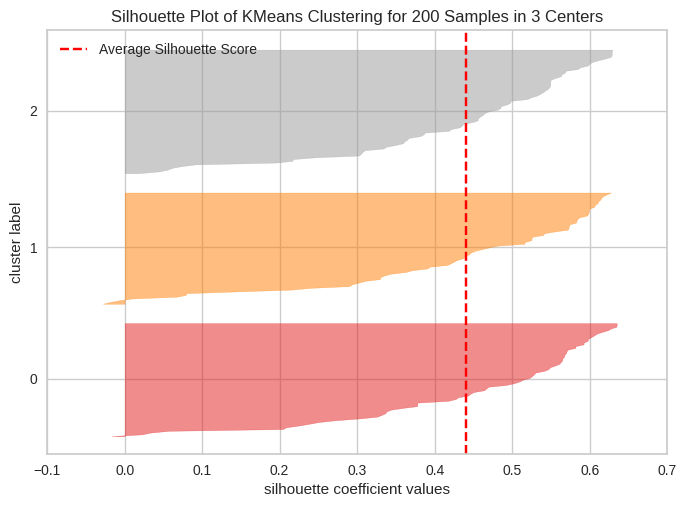

In [33]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

# Fit the data to the visualizer
visualizer.fit(X1)
visualizer.poof();